# Projeto para reconhecimento do estágio de desenvolvimento de Culturas de Soja

Esse projeto foi desenvolvido para disciplina de Deep Learning, e o objetivo é utilizar o TensorFlow/Keras para reconhecer o estágio de desenvolvimento de plantações de soja, tomando como base um conjunto de imagens ilustrativas fornecidas pela Bayer. A maior parte do código foi baseada no vídeo que se encontra no link: https://www.youtube.com/watch?v=jztwpsIzEGc

# 0. Criando a base de validação

In [3]:
# Caminhos para as pastas de treino e teste
import os

train_dir = os.path.join('data', 'TRN')
test_dir = os.path.join('data', 'TST')

In [4]:
val_dir = os.path.join('data', 'VAL')
os.makedirs(val_dir, exist_ok=True)

for i in range(1,9):
    os.makedirs(os.path.join(val_dir, str(i)), exist_ok=True)

In [5]:
files_train = os.listdir(os.path.join(train_dir, '1'));
len(files_train)

1638

In [6]:
files_test = os.listdir(os.path.join(test_dir, '1'));
len(files_test)

819

In [7]:
files_val = os.listdir(os.path.join(val_dir, '1'));
len(files_val)

273

In [8]:
length_files_train = len(files_train)
length_files_teste = len(files_test)
length_files_val = len(files_val)

In [9]:
for i in range(1,9):
    size = len(os.listdir(os.path.join(train_dir, str(i))))
    print(f'TRN/{i} : {size}')

TRN/1 : 1638
TRN/2 : 1638
TRN/3 : 1638
TRN/4 : 1638
TRN/5 : 1638
TRN/6 : 1638
TRN/7 : 1638
TRN/8 : 1638


In [10]:
for i in range(1,9):
    size = len(os.listdir(os.path.join(test_dir, str(i))))
    print(f'TST/{i} : {size}')

TST/1 : 819
TST/2 : 819
TST/3 : 819
TST/4 : 819
TST/5 : 819
TST/6 : 819
TST/7 : 819
TST/8 : 819


In [11]:
for i in range(1,9):
    size = len(os.listdir(os.path.join(val_dir, str(i))))
    print(f'VAL/{i} : {size}')

VAL/1 : 273
VAL/2 : 273
VAL/3 : 273
VAL/4 : 273
VAL/5 : 273
VAL/6 : 273
VAL/7 : 273
VAL/8 : 273


In [12]:
'''
import os
import shutil
import random

# Para cada categoria, pegar um número específico de imagens para validação
categories = os.listdir(train_dir)

for category in ['1', '2', '3', '4', '5', '6', '7', '8']:
    # Caminhos para as categorias de treino e teste
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    
    # Listar as imagens de cada categoria
    train_images = os.listdir(train_category_dir)
    test_images = os.listdir(test_category_dir)

    # Pegar as 50 primeiras imagens de treino e 100 imagens de teste
    val_train_images = random.sample(train_images, int(0.1*length_arquivos_treino))
    val_test_images = random.sample(test_images, int(0.1*length_arquivos_teste))

    # Embaralhar as imagens para garantir aleatoriedade
    val_images = val_train_images + val_test_images
    random.shuffle(val_images)

    # Criar a pasta de validação da categoria, se não existir
    val_category_dir = os.path.join(val_dir, category)
    os.makedirs(val_category_dir, exist_ok=True)

    # Mover as imagens de treino e teste para a pasta de validação
    for image in val_images:
        # Caminho completo da imagem
        if image in val_train_images:
            src = os.path.join(train_category_dir, image)
        else:
            src = os.path.join(test_category_dir, image)
        
        dst = os.path.join(val_category_dir, image)
        
        # Mover para a pasta de validação
        shutil.move(src, dst)

print("Conjunto de validação criado com sucesso!")
'''

'\nimport os\nimport shutil\nimport random\n\n# Para cada categoria, pegar um número específico de imagens para validação\ncategories = os.listdir(train_dir)\n\nfor category in [\'1\', \'2\', \'3\', \'4\', \'5\', \'6\', \'7\', \'8\']:\n    # Caminhos para as categorias de treino e teste\n    train_category_dir = os.path.join(train_dir, category)\n    test_category_dir = os.path.join(test_dir, category)\n    \n    # Listar as imagens de cada categoria\n    train_images = os.listdir(train_category_dir)\n    test_images = os.listdir(test_category_dir)\n\n    # Pegar as 50 primeiras imagens de treino e 100 imagens de teste\n    val_train_images = random.sample(train_images, int(0.1*length_arquivos_treino))\n    val_test_images = random.sample(test_images, int(0.1*length_arquivos_teste))\n\n    # Embaralhar as imagens para garantir aleatoriedade\n    val_images = val_train_images + val_test_images\n    random.shuffle(val_images)\n\n    # Criar a pasta de validação da categoria, se não exist

# 1. Configurações Básicas

In [14]:
!pip install tensorflow opencv-python matplotlib

In [15]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-pro

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [18]:
tf.config.list_physical_devices('GPU') # Por enquanto, minha GPU não está sendo detectada. Vou tentar fazer sem mesmo

[]

# 2. Importando e tratando as imagens

In [20]:
import numpy as np
from matplotlib import pyplot as plt

data_dir = 'data' 

In [21]:
# Definindo uma pipeline para importar as imagens (assim não precisam ser todas salvas em memória de uma vez)

data_train = tf.keras.utils.image_dataset_from_directory(
    'data/TRN',
    image_size=(256, 256),
    batch_size=32
)

data_train_without_augmentation = data_train

Found 13104 files belonging to 8 classes.


In [41]:
# Data augmentation sendo aplicado nos dados de treino para melhorar a generalização do modelo

from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth

# Definindo camadas de Data Augmentation

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.4),
    RandomZoom(0.4),
])

# Aplicando Data Augmentation apenas ao dataset de treino
data_train = data_train.map(lambda x, y: (data_augmentation(x, training=True), y))

In [43]:
# Definindo uma pipeline para importar as imagens (assim não precisam ser todas salvas em memória de uma vez)

data_test = tf.keras.utils.image_dataset_from_directory(
    'data/TST',
    image_size=(256, 256),
    batch_size=32
)

Found 6552 files belonging to 8 classes.


In [45]:
data_val = tf.keras.utils.image_dataset_from_directory(
    'data/VAL',
    image_size=(256, 256),
    batch_size=32
)

Found 2184 files belonging to 8 classes.


In [47]:
# Regularizando os valores para o intervalo de 0 a 1

data_train = data_train.map(lambda x,y: (x/255, y))
data_train = data_train.shuffle(32, reshuffle_each_iteration=True) 

data_test = data_test.map(lambda x,y: (x/255, y))
data_test = data_test.shuffle(32, reshuffle_each_iteration=True) 

data_val = data_val.map(lambda x,y: (x/255, y))

In [49]:
# Usando one-hot encoding para definir as labels corretamente

from tensorflow.keras.utils import to_categorical

def preprocess_labels(image, label):
    label_one_hot = to_categorical(label, num_classes=8)
    return image, label_one_hot

data_train = data_train.map(preprocess_labels)
data_val = data_val.map(preprocess_labels)

In [51]:
# Definindo um iterator para cada pipeline. 
# Esses objetos serão usados para "puxar" um batch novo de imagens para memória sempre que necessário

data_train_iterator = data_train.as_numpy_iterator()
data_test_iterator = data_test.as_numpy_iterator()
data_val_iterator = data_val.as_numpy_iterator()

In [53]:
batch_train = data_train_iterator.next()
batch_test = data_test_iterator.next()
batch_val = data_val_iterator.next()

In [55]:
print(f'Os valores estão entre {batch_train[0].min()} e {batch_test[0].max()}')

Os valores estão entre 0.00010181801917497069 e 0.9965150356292725


In [57]:
# O batch é um tupla formada por uma lista de valores 
# (que são as imagens importadas em memória no formato de uma lista de listas com três elementos - cores BGR - do NumPy) 
# E uma lista de rótulos, que se referem a pasta (e futuramente, classificação) da imagem

# As cores estão no formato BGR porque esse é o padrão do NumPy, o que exige uma conversão posterior (geralmente)

print(batch_train[0]) # matrizes NumPy que representam as imagens

[[[[0.41172302 0.31742465 0.21570733]
   [0.52613735 0.43024802 0.32237488]
   [0.6375941  0.5397082  0.42736545]
   ...
   [0.64339554 0.5470308  0.42799172]
   [0.63421804 0.5370774  0.41765663]
   [0.6288108  0.5324224  0.41087338]]

  [[0.41359964 0.31849292 0.21755114]
   [0.51531106 0.41782826 0.31251317]
   [0.62064445 0.5211252  0.41188684]
   ...
   [0.64148617 0.5412866  0.42245945]
   [0.632907   0.5332992  0.4134245 ]
   [0.6275432  0.52888805 0.40627402]]

  [[0.41116783 0.31482345 0.21565087]
   [0.5035611  0.40421772 0.30197576]
   [0.6075417  0.5063546  0.40046483]
   ...
   [0.64775115 0.54573625 0.42578736]
   [0.641174   0.5397693  0.41895512]
   [0.636258   0.5354363  0.4122243 ]]

  ...

  [[0.60933256 0.5073655  0.37367693]
   [0.70337296 0.60141224 0.46515173]
   [0.78112894 0.6791682  0.541456  ]
   ...
   [0.6546506  0.57117873 0.44846755]
   [0.6302646  0.5403478  0.41845134]
   [0.5856226  0.49068782 0.37184685]]

  [[0.59153146 0.4895707  0.35483974]
   [0.6

In [59]:
# rótulos que representam as categorias em OneHotEncoding 
# (ou seja, cada uma é uma lista com zeros e ums, que representa o número referente à categoria - de 0 7 - )

print(batch_train[1]) 

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


In [61]:
# Podemos converter os labels de OntHotEncondig para números normais, e ver as categorias de cada imagem do batch normalmente
# (lembrando que o batch tem 32 imagens, por isso 32 valores na lista)

one_hot_labels = batch_train[1]
class_labels = np.argmax(one_hot_labels, axis=1)
class_labels

array([0, 0, 0, 6, 0, 0, 5, 7, 3, 7, 4, 7, 7, 1, 3, 4, 2, 6, 0, 5, 0, 0,
       7, 4, 2, 0, 0, 4, 4, 4, 7, 4], dtype=int64)

In [ ]:
len(batch_train[0]) # cada batch importa 32 imagens 

In [ ]:
print(batch_train[0][0][0][0]) # um pixel (com as regularização, seus valores estarão entre 0 e 1)

In [ ]:
print(255*batch_train[0][0][0][0]) # um pixel com os valores entre 0 e 255

In [ ]:
len(batch_train[0][0][0]) # uma linha de pixels da imagem

In [ ]:
len(batch_train[0][0]) # uma lista de linhas - ou seja, a imagem

In [63]:
# Visualizando algumas imagens

fig, ax = plt.subplots(ncols=4, figsize=(251,244))
for idx, img in enumerate(batch_train[0][:4]):
    ax[idx].imshow((255*img).astype(int))
    ax[idx].title.set_text(batch_train[1][idx])

# Note o efeito do data augmentation nas imagens

In [64]:
# Para comparação, vamos ver as imagens plotadas sem data augmentation

batch_without_augmentation = data_train_without_augmentation.map(lambda x,y: (x/255, y)).as_numpy_iterator().next()

fig, ax = plt.subplots(ncols=4, figsize=(251,244))
for idx, img in enumerate(batch_without_augmentation[0][:4]):
    ax[idx].imshow((255*img).astype(int))
    ax[idx].title.set_text(batch_without_augmentation[1][idx])


# 3. Construindo o Modelo de Deep Learning

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# Arquitetura 2

'''
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25)) 

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))  

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  

model.add(Dense(8, activation='softmax'))
'''

In [69]:
# Arquitetura 3

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(576, activation='relu'))

model.add(Dense(35, activation='relu')) # reduz em 8 vezes o número de neurônios

# model.add(Dense(35, activation='relu'))
# reduzindo o número de camadas para o modelo não ficar excessivamente grande e demorado de treinar
# model.add(Dense(35, activation='relu'))

model.add(Dense(70, activation='relu')) # dobra o número de neurônios na ultima

model.add(Dense(8, activation='softmax'))

C:\Dev\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 576)            │     7,225,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │        20,195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,275,107 (27.75 MB)

 Trainable params: 7,275,107 (27.75 MB)

 Non-trainable params: 0 (0.00 B)

# 4. Treinando o Modelo

In [75]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(
    data_train,
    epochs=20,
    validation_data=data_val,
    callbacks=[tensorboard_callback]
)

Epoch 1/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 186s 432ms/step - accuracy: 0.5048 - loss: 1.1422 - val_accuracy: 0.7500 - val_loss: 0.4439
Epoch 2/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 181s 424ms/step - accuracy: 0.8135 - loss: 0.3801 - val_accuracy: 0.9789 - val_loss: 0.1317
Epoch 3/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 180s 421ms/step - accuracy: 0.9445 - loss: 0.1465 - val_accuracy: 0.9684 - val_loss: 0.0839
Epoch 4/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 180s 420ms/step - accuracy: 0.9737 - loss: 0.0690 - val_accuracy: 0.9840 - val_loss: 0.0436
Epoch 5/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 180s 420ms/step - accuracy: 0.9762 - loss: 0.0619 - val_accuracy: 0.9281 - val_loss: 0.1379
Epoch 6/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 180s 420ms/step - accuracy: 0.9716 - loss: 0.0729 - val_accuracy: 0.9863 - val_loss: 0.0391
Epoch 7/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 179s 419ms/step - accuracy: 0.9823 - loss: 0.0434 - val_accuracy: 0.9954 - val_loss: 0.0136
Epoch 8/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 179s 419ms/step - accuracy: 0.9712 -

# 5. Estatísticas do Resultado

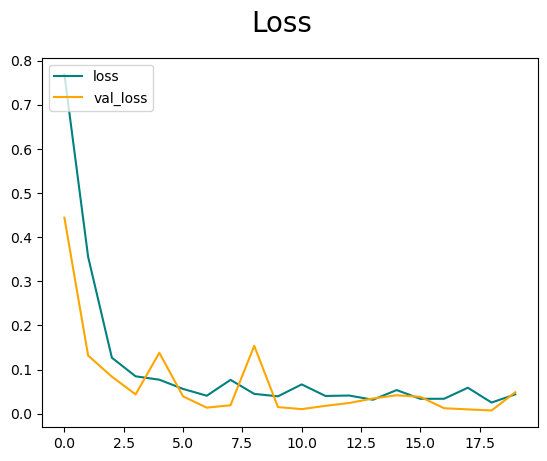

In [152]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

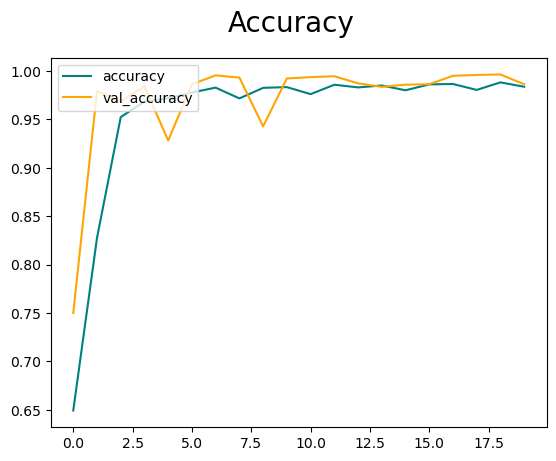

In [154]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [156]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [158]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [160]:
for batch in data_test.as_numpy_iterator():
    X, y = batch  # y é o vetor de rótulos com 32 categorias
    yhat = model.predict(X)  # yhat é um array de forma (32, 8), com as previsões de probabilidade
    
    # Converte as probabilidades para rótulos pegando o índice da maior probabilidade
    yhat_labels = tf.argmax(yhat, axis=1)  # yhat_labels será um vetor de rótulos, assim como y
    
    # Agora, atualize as métricas usando y e yhat_labels, que possuem a mesma forma
    pre.update_state(y, yhat_labels)
    re.update_state(y, yhat_labels)
    acc.update_state(y, yhat_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━

In [162]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9960041642189026, Recall:1.0, Accuracy:0.24648961424827576


Interpretação dos valores no segundo teste pelo GPT: 

* Precision: 0.99
* Recall:1.0
* Accuracy:0.24

**Precision (Precisão): 0.9960 ou 99.6%**

* Precisão mede a proporção de previsões corretas dentre as que foram previstas como positivas. Ou seja, dentre todas as instâncias que o modelo classificou como pertencendo a uma determinada classe, 99.6% eram de fato corretas.
Uma precisão alta indica que quando o modelo prediz uma classe, ele geralmente está correto, mas não necessariamente está capturando todas as instâncias dessa classe (isso depende do recall).

**Recall (Revocação ou Sensibilidade): 1.0 ou 100%**

* Recall mede a proporção de instâncias corretas que foram detectadas em relação ao total de instâncias reais dessa classe. Um valor de 100% significa que o modelo detectou todas as instâncias positivas, ou seja, não deixou de prever nenhuma classe que deveria ter sido prevista.
Um recall de 1.0 é ótimo, pois indica que o modelo está capturando todas as amostras relevantes de cada classe.

**Accuracy (Acurácia): 0.2465 ou 24.65%**

* Acurácia mede a proporção total de previsões corretas (todas as classes) em relação ao número total de previsões feitas. Ou seja, o modelo acertou cerca de 24.65% de todas as previsões.
Apesar da alta precisão e recall, uma acurácia de 24.65% indica que o modelo está com um desempenho baixo em termos de prever a classe correta em geral.

**Interpretação combinada:**

* O alto recall e alta precisão sugerem que, para algumas classes específicas, o modelo está acertando quase tudo que prevê (ou seja, ele classifica com precisão), mas a baixa acurácia indica que o desempenho geral ainda é insatisfatório.
Isso pode acontecer, por exemplo, se o modelo estiver muito bom em prever uma ou algumas classes específicas, mas não estiver lidando bem com outras classes.
* Como você tem 8 categorias, talvez o modelo esteja se concentrando em uma classe majoritária, prevendo essa classe muito bem, mas não se saindo bem nas outras classes, o que derruba a acurácia geral.

Isso faz sentido com o comportamento observado para o segundo teste, onde os casos de 1 a 4 são quase sempre acertados e de 5 a 8, quase sempre ele erra

# 6. Testando o Modelo diretamente

## Reconhecendo uma imagem de categoria 1

In [164]:
import cv2

# Importando uma imagem da categoria 1 para testar o funcionamento

def getImage(path):
    img = cv2.imread(path)
    resize = tf.image.resize(img, (256,256))
    resize = tf.clip_by_value(resize, 0.0, 255.0)
    resize = tf.cast(resize, tf.uint8)
    return resize

def showImage(resize):
    rgb_img = cv2.cvtColor(resize.numpy(), cv2.COLOR_BGR2RGB)
    
    plt.imshow(rgb_img)
    plt.show() 

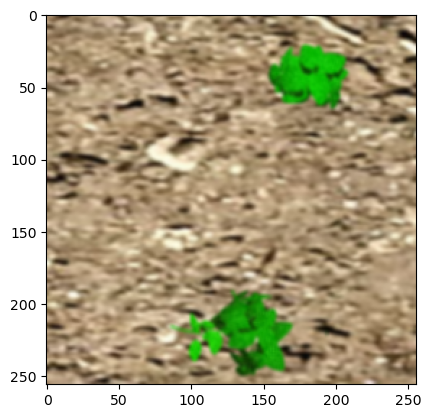

In [166]:
image_test1 = getImage('test/test_category1.png')
showImage(image_test1)

In [168]:
# Função para prever a categoria da imagem. Os detalhes da estrutura dela estão nas linhas abaixo

def predictCategory(image): 
    yhat = model.predict(np.expand_dims(image / 255, 0))  
    predicted_class = np.argmax(yhat)  
    for i, prediction in enumerate(yhat[0]):  
        print(f'Probability of Class {i + 1}: {prediction * 100:.2f}%')  
    print(f'The predicted class is: {predicted_class + 1}')  

In [170]:
# Verificar a previsão realizada pelo modelo
# É retornado um vetor com 8 valores, que representam a "probabilidade" da imagem pertencer a cada categoria

yhat = model.predict(np.expand_dims(image_test1/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[9.9947184e-01, 8.3982826e-07, 3.5041566e-08, 9.5694631e-08,
        2.1867534e-10, 3.7467229e-10, 2.8695826e-08, 5.2707549e-04]],
      dtype=float32)

In [172]:
# Pegando a classe com maior probabilidade

predicted_class = np.argmax(yhat) + 1
print(f'A classe prevista é: {predicted_class}')

A classe prevista é: 1


In [174]:
predictCategory(image_test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Probability of Class 1: 99.95%
Probability of Class 2: 0.00%
Probability of Class 3: 0.00%
Probability of Class 4: 0.00%
Probability of Class 5: 0.00%
Probability of Class 6: 0.00%
Probability of Class 7: 0.00%
Probability of Class 8: 0.05%
The predicted class is: 1


## Reconhecendo uma imagem de categoria 2

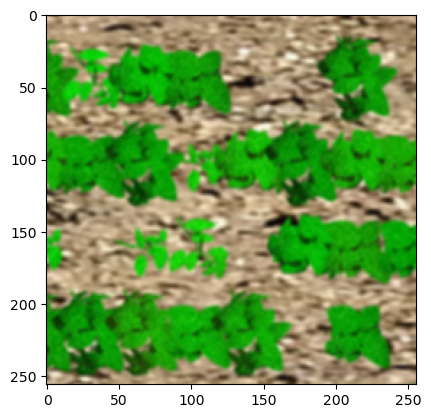

In [99]:
image_test2 = getImage('test/test_category2.png')
showImage(image_test2)

In [101]:
predictCategory(image_test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Probability of Class 1: 0.00%
Probability of Class 2: 80.06%
Probability of Class 3: 19.94%
Probability of Class 4: 0.00%
Probability of Class 5: 0.00%
Probability of Class 6: 0.00%
Probability of Class 7: 0.00%
Probability of Class 8: 0.00%
The predicted class is: 2


## Reconhecendo uma imagem de categoria 3

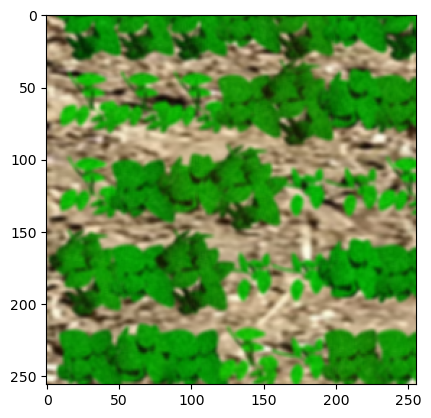

In [103]:
image_test3 = getImage('test/test_category3.png')
showImage(image_test3)

In [105]:
predictCategory(image_test3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Probability of Class 1: 0.00%
Probability of Class 2: 0.00%
Probability of Class 3: 99.70%
Probability of Class 4: 0.30%
Probability of Class 5: 0.00%
Probability of Class 6: 0.00%
Probability of Class 7: 0.00%
Probability of Class 8: 0.00%
The predicted class is: 3


## Reconhecendo uma imagem de categoria 4

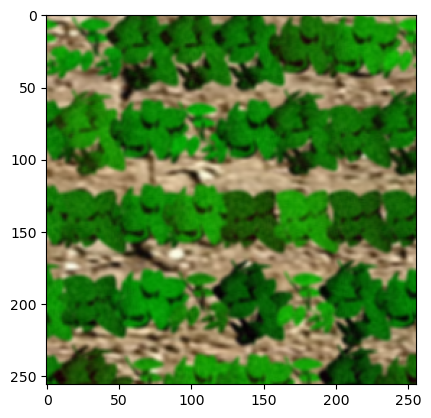

In [107]:
image_test4 = getImage('test/test_category4.png')
showImage(image_test4)

In [109]:
predictCategory(image_test4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Probability of Class 1: 0.00%
Probability of Class 2: 0.00%
Probability of Class 3: 0.00%
Probability of Class 4: 100.00%
Probability of Class 5: 0.00%
Probability of Class 6: 0.00%
Probability of Class 7: 0.00%
Probability of Class 8: 0.00%
The predicted class is: 4


## Reconhecendo uma imagem de categoria 5

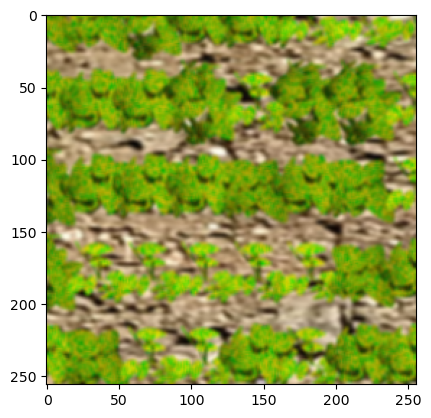

In [111]:
image_test5 = getImage('test/test_category5.png')
showImage(image_test5)

In [113]:
predictCategory(image_test5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Probability of Class 1: 2.46%
Probability of Class 2: 2.26%
Probability of Class 3: 4.21%
Probability of Class 4: 22.18%
Probability of Class 5: 30.72%
Probability of Class 6: 32.69%
Probability of Class 7: 4.04%
Probability of Class 8: 1.43%
The predicted class is: 6


## Reconhecendo uma imagem de categoria 6

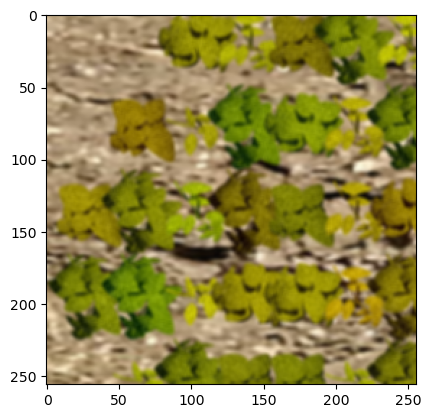

In [115]:
image_test6 = getImage('test/test_category6.png')
showImage(image_test6)

In [117]:
predictCategory(image_test6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Probability of Class 1: 60.55%
Probability of Class 2: 0.16%
Probability of Class 3: 0.05%
Probability of Class 4: 0.05%
Probability of Class 5: 0.11%
Probability of Class 6: 1.48%
Probability of Class 7: 1.95%
Probability of Class 8: 35.66%
The predicted class is: 1


## Reconhecendo uma imagem de categoria 7

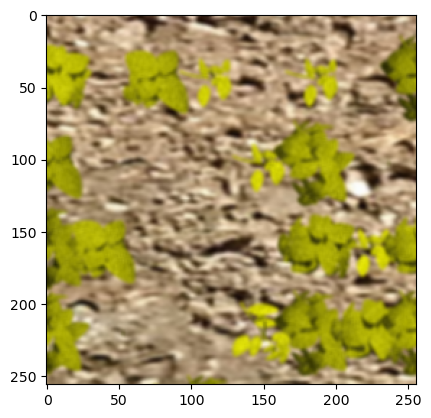

In [119]:
image_test7 = getImage('test/test_category7.png')
showImage(image_test7)

In [121]:
predictCategory(image_test7)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Probability of Class 1: 78.03%
Probability of Class 2: 0.01%
Probability of Class 3: 0.00%
Probability of Class 4: 0.00%
Probability of Class 5: 0.00%
Probability of Class 6: 0.19%
Probability of Class 7: 0.41%
Probability of Class 8: 21.35%
The predicted class is: 1


## Reconhecendo uma imagem de categoria 8

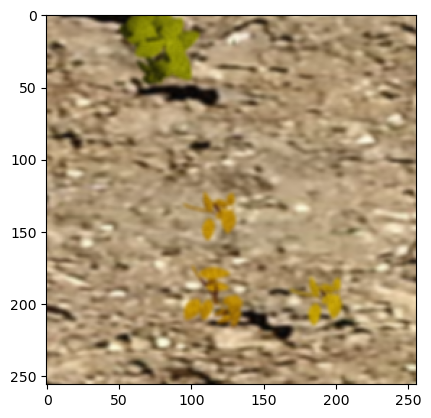

In [123]:
image_test8 = getImage('test/test_category8.png')
showImage(image_test8)

In [125]:
predictCategory(image_test8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Probability of Class 1: 80.40%
Probability of Class 2: 0.01%
Probability of Class 3: 0.00%
Probability of Class 4: 0.00%
Probability of Class 5: 0.00%
Probability of Class 6: 0.02%
Probability of Class 7: 0.11%
Probability of Class 8: 19.46%
The predicted class is: 1


# 7. Salvando o modelo

In [130]:
from tensorflow.keras.models import load_model

In [136]:
model.save(os.path.join('models','SoyField3.h5'))

In [138]:
model.save('models/SoyField3.keras')

In [142]:
model = load_model(os.path.join('models', 'SoyField2.keras'))